<a href="https://colab.research.google.com/github/Szymqn/ProgramowanieRownolegleIRozproszone/blob/master/lab4/zadanie1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from multiprocessing import Pool, cpu_count, Queue, Process
from math import sqrt, fabs
from random import random
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from joblib import Parallel, delayed

Zaimplementuj wariant szeregowy oraz równoległy następujących algorytmów

a. całkowanie numeryczne wybranej funkcji f(x) w przedziale <a,b> metodą trapezów

https://pl.wikipedia.org/wiki/Ca%C5%82kowanie_numeryczne

szeregowo:

In [2]:
def integral(x):
    # return x ** 2
    return (sqrt(x ** 2 + .3))/(1.4 + sqrt(.8 * (x ** 2) + 1.6))

def trapeze_method(integral, lower_limit, upper_limit, n):
    result = 0
    results = []
    h = round((upper_limit - lower_limit) / n, 1)
    for i in np.arange(lower_limit, upper_limit+h, h):
        results.append(integral(i))
    for i in range(len(results)):
        if i == 0 or i == len(results)-1:
            result += results[i] / 2
        else:
            result += results[i]
    return h * result

In [3]:
lower_limit = 4
upper_limit = 20
n = 50

start_time = time.time()
result = trapeze_method(integral, lower_limit, upper_limit, n)
end_time = time.time()
execution_time = end_time - start_time
execution_time *= 1000

print(f"Wynik dla n = {n}, moteda trapezów: {result} w czasie {execution_time} ms.")

Wynik dla n = 50, moteda trapezów: 15.606642933046562 w czasie 0.1823902130126953 ms.


równolegle:

In [4]:

def integral(x):
    # return x ** 2
    return (sqrt(x ** 2 + .3))/(1.4 + sqrt(.8 * (x ** 2) + 1.6))

def compute_area(args):
    i, h = args[4], args[5]
    if i == 0 or i == args[3]:
        return args[0](args[1] + i * h) / 2
    else:
        return args[0](args[1] + i * h)

def trapeze_method_parallel(integral, lower_limit, upper_limit, n, num_processes):
    h = (upper_limit - lower_limit) / n
    pool = Pool(processes=num_processes)
    args = [(integral, lower_limit, upper_limit, n, i, h) for i in range(n + 1)]
    results = pool.map(compute_area, args)
    pool.close()
    pool.join()

    return h * sum(results)

In [5]:
lower_limit = 4
upper_limit = 20
n = 50
num_processes = 2

start_time = time.time()
result = trapeze_method_parallel(integral, lower_limit, upper_limit, n, num_processes)
end_time = time.time()
execution_time = end_time - start_time
execution_time *= 1000

print(f"Wynik dla n = {n}, metoda trapezów: {result} w czasie {execution_time} ms.")

Wynik dla n = 50, metoda trapezów: 15.399527000258907 w czasie 45.43328285217285 ms.


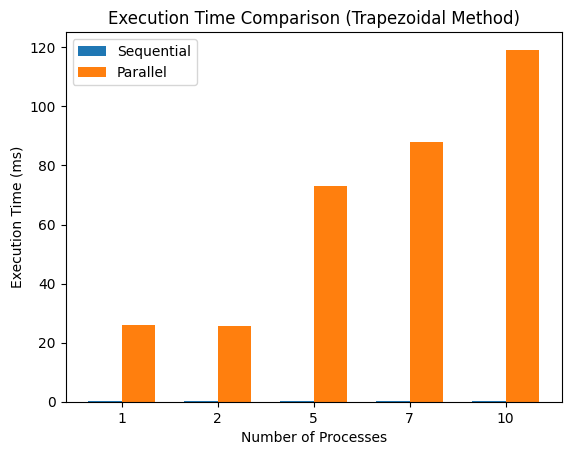

In [6]:
lower_limit = 4
upper_limit = 20
n = 50
num_processes_values = [1, 2, 5, 7, 10]

non_parallel_execution_times = []
parallel_execution_times = []

for num_processes in num_processes_values:
    start_time = time.time()
    result = trapeze_method(integral, lower_limit, upper_limit, n)
    end_time = time.time()
    execution_time = (end_time - start_time) * 1000
    non_parallel_execution_times.append(execution_time)

    start_time = time.time()
    result = trapeze_method_parallel(integral, lower_limit, upper_limit, n, num_processes)
    end_time = time.time()
    execution_time = (end_time - start_time) * 1000
    parallel_execution_times.append(execution_time)

x = range(len(num_processes_values))
width = 0.35
fig, ax = plt.subplots()
ax.bar([i - width/2 for i in x], non_parallel_execution_times, width, label='Sequential')
ax.bar([i + width/2 for i in x], parallel_execution_times, width, label='Parallel')
ax.set_xlabel('Number of Processes')
ax.set_ylabel('Execution Time (ms)')
ax.set_xticks(x)
ax.set_xticklabels(num_processes_values)
ax.legend()
ax.set_title('Execution Time Comparison (Trapezoidal Method)')
plt.show()

b. wyznaczanie pola koła metodą Monte Carlo

https://pl.wikipedia.org/wiki/Metoda_Monte_Carlo

szeregowo:

In [7]:
def pi(n):
  count = 0
  for i in range(n):
    x, y = random(), random()
    r = sqrt(pow(x, 2) + pow(y, 2))
    if r < 1:
      count += 1
  return 4 * count / n

In [8]:
n = 1000000

start_time = time.time()
result = pi(n)
pi_est = result
end_time = time.time()
execution_time = end_time - start_time
execution_time *= 1000

print(f"Wynik dla n = {n}, metoda Monte Carlo: {pi_est} w czasie {execution_time} ms.")

Wynik dla n = 1000000, metoda Monte Carlo: 3.144512 w czasie 675.4767894744873 ms.


równolegle:

In [9]:
def pi_part(n):
  count = 0
  for i in range(int(n)):
    x, y = random(), random()
    r = sqrt(pow(x, 2) + pow(y, 2))
    if r < 1:
      count += 1
  return count

In [10]:
start_time = time.time()
np = cpu_count()
print(f'You have {np} cores')
n = 1000000
part_count = [n/np for i in range(np)]

with Pool(processes=np) as pool:
  count = pool.map(pi_part, part_count)
  pi_est = sum(count) / (n * 1.0) * 4
  end_time = time.time()
  execution_time = end_time - start_time
  execution_time *= 1000
  print(f"Wynik dla n = {n}, metoda Monte Carlo: {pi_est} w czasie {execution_time} ms.")

You have 2 cores
Wynik dla n = 1000000, metoda Monte Carlo: 3.14266 w czasie 538.1155014038086 ms.


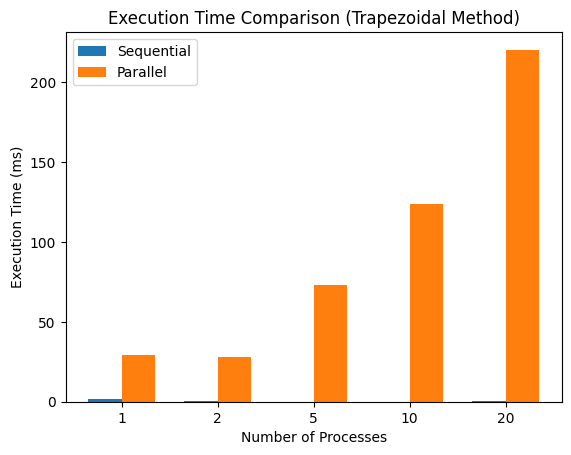

In [11]:
import numpy as np

lower_limit = 4
upper_limit = 20
n = 50
num_processes_values = [1, 2, 5, 10, 20]

non_parallel_execution_times = []
parallel_execution_times = []

for num_processes in num_processes_values:
    start_time = time.time()
    result = trapeze_method(integral, lower_limit, upper_limit, n)
    end_time = time.time()
    execution_time = (end_time - start_time) * 1000
    non_parallel_execution_times.append(execution_time)

    start_time = time.time()
    result = trapeze_method_parallel(integral, lower_limit, upper_limit, n, num_processes)
    end_time = time.time()
    execution_time = (end_time - start_time) * 1000
    parallel_execution_times.append(execution_time)

# Create a bar plot
x = range(len(num_processes_values))
width = 0.35
fig, ax = plt.subplots()
ax.bar([i - width/2 for i in x], non_parallel_execution_times, width, label='Sequential')
ax.bar([i + width/2 for i in x], parallel_execution_times, width, label='Parallel')
ax.set_xlabel('Number of Processes')
ax.set_ylabel('Execution Time (ms)')
ax.set_xticks(x)
ax.set_xticklabels(num_processes_values)
ax.legend()
ax.set_title('Execution Time Comparison (Trapezoidal Method)')
plt.show()

c. generowanie fraktali Mandelbrota oraz Julii

https://pl.wikipedia.org/wiki/Zbi%C3%B3r_Mandelbrota

https://pl.wikipedia.org/wiki/Zbi%C3%B3r_Julii

Fraktal Mondelbrota:

szeregowo:

In [12]:
def mandelbrot(c, max_iterations=100):
    z = 0
    for i in range(max_iterations):
        z = z ** 2 + c
        if z.real ** 2 + z.imag ** 2 > 4:
            return i + 1
        if i == max_iterations - 1:
            return 0

def mandelbrot_serial(xmin, xmax, ymin, ymax, N=100):
    incx = abs((xmax - xmin) / N)
    incy = abs((ymax - ymin) / N)
    x, y, myList, n, arr = xmin, ymax, [], 1, []
    while y > ymin and n <= N:
        while x < xmax:
            i = mandelbrot(complex(x, y), 100)
            myList.append(i)
            x += incx
        arr.append(myList[:N])
        x = xmin
        y -= incy
        myList = []
        n += 1
    return arr

mandelbrot_serial, Resolution 600x600:
10.156326532363892 secs


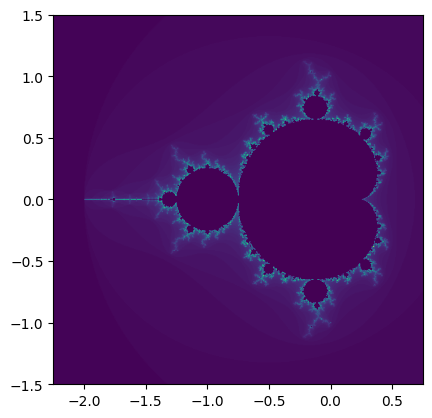

In [13]:
xmin = -2.25
xmax = 0.75
ymin = -1.5
ymax = 1.5

print('mandelbrot_serial, Resolution 600x600:')
start = time.time()
arr = mandelbrot_serial(xmin, xmax, ymin, ymax, N=600)
end = time.time()
print(f'{end - start} secs')
plt.imshow(arr, extent=[xmin, xmax, ymin, ymax])
plt.savefig('MandelBrot.png')
plt.show()

równolegle:

In [14]:
import numpy as np

def mandelbrot(c, max_iterations=100):
    z = 0
    for i in range(max_iterations):
        z = z**2 + c
        if z.real**2 + z.imag**2 > 4:
            return i+1
        if i == max_iterations-1:
            return 0


def mandelbrot_serial(xmin, xmax, ymin, ymax, N=100):
    incx= fabs((xmax-xmin)/N)
    incy= fabs((ymax-ymin)/N)
    x, y, myList, n, arr = xmin, ymax, [], 1, np.ndarray(shape=(0, N))
    while y > ymin and n <= N:
        while x < xmax:
            i=mandelbrot(complex(x,y), 100)
            myList.append(i)
            x += incx
        arr = np.append(arr, np.array([myList[:N]]), axis=0)
        x = xmin
        y -= incy
        myList=[]
        n += 1
    return arr


def call_mandelbrot_serial(xmin, xmax, ymin, ymax, N, results, i):
    results.put({i:mandelbrot_serial(xmin, xmax, ymin, ymax, N)})

def mandelbrot_static(xmin, xmax, ymin, ymax, N=100):
    results = Queue()
    processes = []
    count = cpu_count() // 2
    arr_upper = np.ndarray(shape=(0, N//count))
    arr_lower = np.ndarray(shape=(0, N//count))
    incx = fabs((xmax - xmin) / count)

    x, i = xmin, 0
    while i < cpu_count():
        i += 1
        if i == count+1:
            x = xmin

        if i > count:
            p = Process(target=call_mandelbrot_serial, args=(x, x + incx, ymin, 0, N//count, results, i))
            p.start()
            processes.append(p)
            x += incx
        else:
            p = Process(target=call_mandelbrot_serial, args=(x, x + incx, 0, ymax, N//count, results, i))
            p.start()
            processes.append(p)
            x += incx


    result_set = {}
    for p in processes:
        result_set.update(results.get())

    i = 1

    for p in processes:
        if i <= count:
            if i == 1:
                arr_upper = np.vstack([arr_upper, result_set[i]])
            else:
                arr_upper = np.concatenate((arr_upper, result_set[i]), axis=1)
        else:
            if i == count + 1:
                arr_lower = np.vstack([arr_lower, result_set[i]])
            else:
                arr_lower = np.concatenate((arr_lower, result_set[i]), axis=1)
        i+=1

    for p in processes:
        p.join()

    return np.append(arr_upper, arr_lower, axis=0)


def mandelbrot_dynamic(xmin, xmax, ymin, ymax, N=100):
    incx = fabs((xmax - xmin) / N)
    incy = fabs((ymax - ymin) / N)
    x, y, myList, lst, n = xmin, ymax, [], [], 1
    while y > ymin and n <= N:
        while x < xmax:
            lst.append(complex(x, y))
            x += incx
        x = xmin
        y -= incy
        myList.extend(lst[:N])
        n += 1
        lst = []

    with Pool() as pool:
        result = pool.map(mandelbrot, myList)

    return np.reshape(np.array(result), (N,N))

mandelbrot parallel static, Resolution 600x600:
14.979056358337402 secs


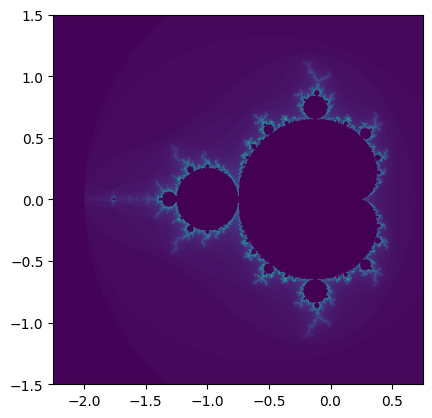


mandelbrot parallel dynamic, Resolution 600x600:
5.436091184616089 secs


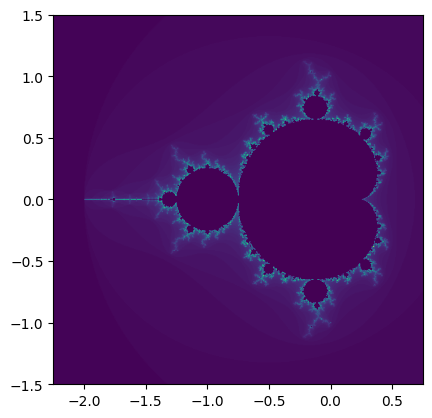

In [15]:
xmin = -2.25
xmax = 0.75
ymin = -1.5
ymax = 1.5

print('mandelbrot parallel static, Resolution 600x600:')
start = time.time()
arr = mandelbrot_static(xmin, xmax, ymin, ymax, N=600)
end = time.time()
print(f'{end - start} secs')
plt.imshow(arr, extent=[xmin, xmax, ymin, ymax])
plt.savefig('MandelBrot.png')
plt.show()

print('\nmandelbrot parallel dynamic, Resolution 600x600:')
start = time.time()
arr = mandelbrot_dynamic(xmin, xmax, ymin, ymax, N=600)
end = time.time()
print(f'{end - start} secs')
plt.imshow(arr, extent=[xmin, xmax, ymin, ymax])
plt.savefig('MandelBrot.png')
plt.show()

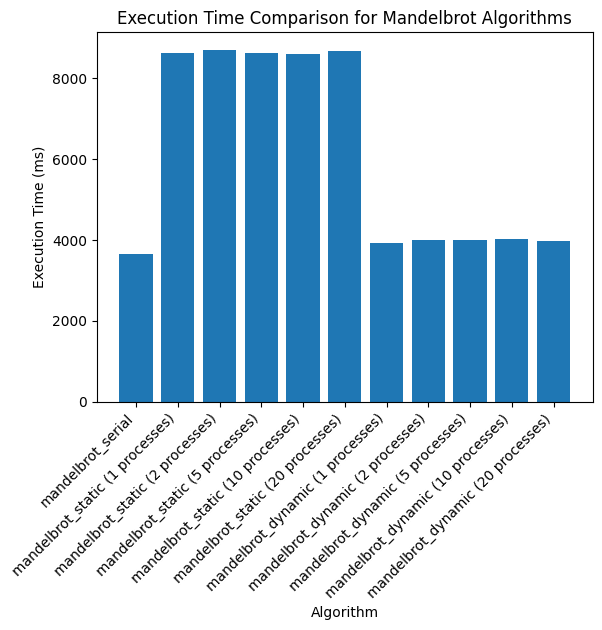

In [16]:
def measure_execution_time(func, *args):
    start_time = time.time()
    result = func(*args)
    end_time = time.time()
    execution_time = (end_time - start_time) * 1000
    return execution_time

xmin = -2.25
xmax = 0.75
ymin = -1.5
ymax = 1.5
N = 600

mandelbrot_serial_time = measure_execution_time(mandelbrot_serial, xmin, xmax, ymin, ymax, N)

num_processes_values = [1, 2, 5, 10, 20]

mandelbrot_static_times = []
mandelbrot_dynamic_times = []

for num_processes in num_processes_values:
    if num_processes == 1:
        mandelbrot_static_time = measure_execution_time(mandelbrot_static, xmin, xmax, ymin, ymax, N)
    else:
        mandelbrot_static_time = measure_execution_time(mandelbrot_static, xmin, xmax, ymin, ymax, N)
    mandelbrot_static_times.append(mandelbrot_static_time)

    if num_processes == 1:
        mandelbrot_dynamic_time = measure_execution_time(mandelbrot_dynamic, xmin, xmax, ymin, ymax, N)
    else:
        mandelbrot_dynamic_time = measure_execution_time(mandelbrot_dynamic, xmin, xmax, ymin, ymax, N)
    mandelbrot_dynamic_times.append(mandelbrot_dynamic_time)

labels = ['mandelbrot_serial'] + [f'mandelbrot_static ({p} processes)' for p in num_processes_values] + [f'mandelbrot_dynamic ({p} processes)' for p in num_processes_values]
times = [mandelbrot_serial_time] + mandelbrot_static_times + mandelbrot_dynamic_times

plt.bar(labels, times)
plt.xlabel('Algorithm')
plt.ylabel('Execution Time (ms)')
plt.title('Execution Time Comparison for Mandelbrot Algorithms')
plt.xticks(rotation=45, ha='right')
plt.show()

Fraktal Julii

szeregowo:

In [17]:
def julii_set(h_range, w_range, max_iterations):
    y, x = np.ogrid[1.4: -1.4: h_range*1j, -1.4: 1.4: w_range*1j]
    z_array = x + y*1j
    a = -0.744 + 0.148j
    iterations_until_divergence = max_iterations + np.zeros(z_array.shape)

    not_already_diverged = iterations_until_divergence < 10000
    diverged_in_past = iterations_until_divergence > 10000

    for i in range(max_iterations):
        z_array = z_array**2 + a
        z_size_array = z_array * np.conj(z_array)
        diverging = z_size_array > 4

        diverging_now = np.logical_and(diverging, not_already_diverged)
        iterations_until_divergence[diverging_now] = i

        not_already_diverged = np.invert(diverging_now) & not_already_diverged
        diverged_in_past = diverged_in_past | diverging_now
        z_array[diverged_in_past] = 0

    return iterations_until_divergence

Wykonano w czasie 17677.348613739014 ms


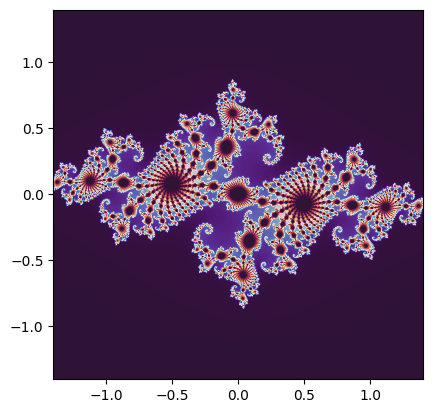

In [18]:
start_time = time.time()
arr = julii_set(2000, 2000, 200)
end_time = time.time()
execution_time = end_time - start_time
execution_time *= 1000
print(f"Wykonano w czasie {execution_time} ms")
plt.imshow(arr, cmap='twilight_shifted', extent=[-1.4, 1.4, -1.4, 1.4])
plt.axis('on')
plt.show()
plt.close()

równolegle:

In [19]:
def compute_julii_set_chunk(h_range, w_range, max_iterations, y_range, x_range):
    y, x = np.meshgrid(y_range, x_range)
    z_array = x + y * 1j
    a = -0.744 + 0.148j
    iterations_until_divergence = max_iterations + np.zeros(z_array.shape)

    not_already_diverged = iterations_until_divergence < 10000
    diverged_in_past = iterations_until_divergence > 10000

    for i in range(max_iterations):
        z_array = z_array**2 + a
        z_size_array = z_array * np.conj(z_array)
        diverging = z_size_array > 4

        diverging_now = np.logical_and(diverging, not_already_diverged)
        iterations_until_divergence[diverging_now] = i

        not_already_diverged = np.invert(diverging_now) & not_already_diverged
        diverged_in_past = diverged_in_past | diverging_now
        z_array[diverged_in_past] = 0

    return iterations_until_divergence

def julii_set_parallel(h_range, w_range, max_iterations, num_processes):
    y, x = np.linspace(1.4, -1.4, h_range), np.linspace(-1.4, 1.4, w_range)

    pool = Pool(num_processes)
    results = []

    y_chunks = np.array_split(y, num_processes)
    x_chunks = np.array_split(x, num_processes)

    for i in range(num_processes):
        y_range = y_chunks[i]
        x_range = x_chunks[i]
        results.append(pool.apply_async(compute_julii_set_chunk, (h_range, w_range, max_iterations, y_range, x_range)))

    pool.close()
    pool.join()

    iterations_until_divergence = np.vstack([result.get() for result in results])
    return iterations_until_divergence

Wykonano w czasie 5742.391586303711 ms


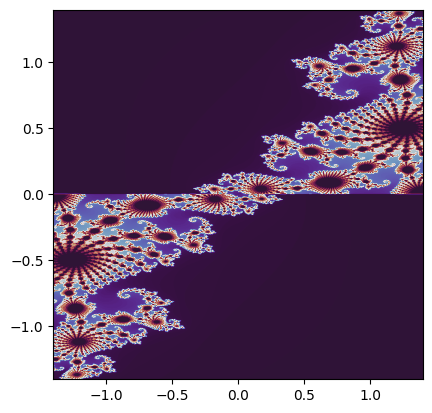

In [20]:
start_time = time.time()
arr = julii_set_parallel(2000, 2000, 200, 2)
end_time = time.time()
execution_time = end_time - start_time
execution_time *= 1000
print(f"Wykonano w czasie {execution_time} ms")
plt.imshow(arr, cmap='twilight_shifted', extent=[-1.4, 1.4, -1.4, 1.4])
plt.axis('on')
plt.show()
plt.close()

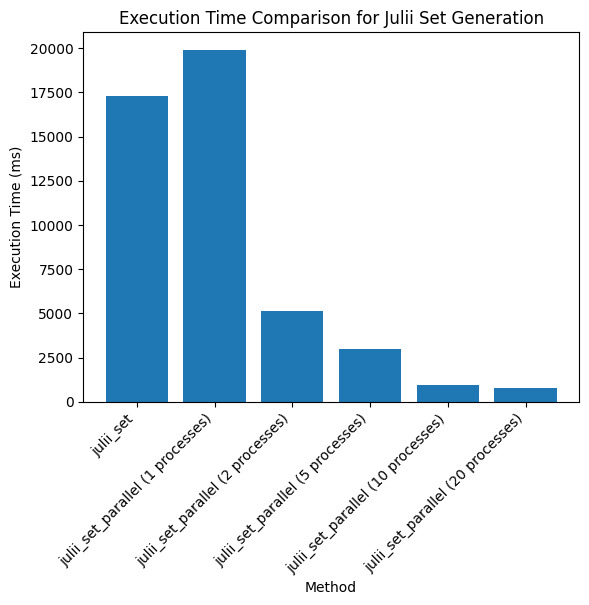

In [21]:
def measure_execution_time(func, *args):
    start_time = time.time()
    result = func(*args)
    end_time = time.time()
    execution_time = (end_time - start_time) * 1000
    return execution_time

def measure_julii_set_parallel_time(num_processes):
    start_time = time.time()
    arr_parallel = julii_set_parallel(2000, 2000, 200, num_processes)
    end_time = time.time()
    execution_time = (end_time - start_time) * 1000
    return execution_time

julii_set_time = measure_execution_time(julii_set, 2000, 2000, 200)

num_processes_values = [1, 2, 5, 10, 20]
julii_set_parallel_times = [measure_julii_set_parallel_time(num_processes) for num_processes in num_processes_values]

labels = ['julii_set'] + [f'julii_set_parallel ({num_processes} processes)' for num_processes in num_processes_values]
times = [julii_set_time] + julii_set_parallel_times

plt.bar(labels, times)
plt.xlabel('Method')
plt.ylabel('Execution Time (ms)')
plt.title('Execution Time Comparison for Julii Set Generation')
plt.xticks(rotation=45, ha='right')
plt.show()

d. wybrany inny algorytm numeryczny, który da sie zrównoleglić

SVM (Support Vector Machine)

szeregowo:

In [22]:
data = datasets.load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def train_and_predict_svm(X_train, y_train, X_test):
    clf = SVC(kernel='linear')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return y_pred

In [23]:
start_time = time.time()
y_pred_serial = train_and_predict_svm(X_train, y_train, X_test)
accuracy_serial = accuracy_score(y_test, y_pred_serial)
end_time = time.time()
execution_time = end_time - start_time
execution_time *= 1000

print(f"Dokładność wersji szeregowej: {accuracy_serial}, w czasie: {execution_time} ms.")

Dokładność wersji szeregowej: 1.0, w czasie: 3.559112548828125 ms.


równoległe:

In [24]:
data = datasets.load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def train_and_predict_svm_parallel(X_train, y_train, X_test, i):
    clf = SVC(kernel='linear')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return y_pred

In [25]:
num_jobs = 4
results_parallel = Parallel(n_jobs=num_jobs)(
    delayed(train_and_predict_svm_parallel)(X_train, y_train, X_test, i) for i in range(num_jobs)
)

start_time = time.time()
y_pred_parallel = results_parallel[0]
accuracy_parallel = accuracy_score(y_test, y_pred_parallel)
end_time = time.time()
execution_time = end_time - start_time
execution_time *= 1000

print(f"Dokładność wersji szeregowej: {accuracy_parallel}, w czasie: {execution_time} ms.")

Dokładność wersji szeregowej: 1.0, w czasie: 1.5053749084472656 ms.


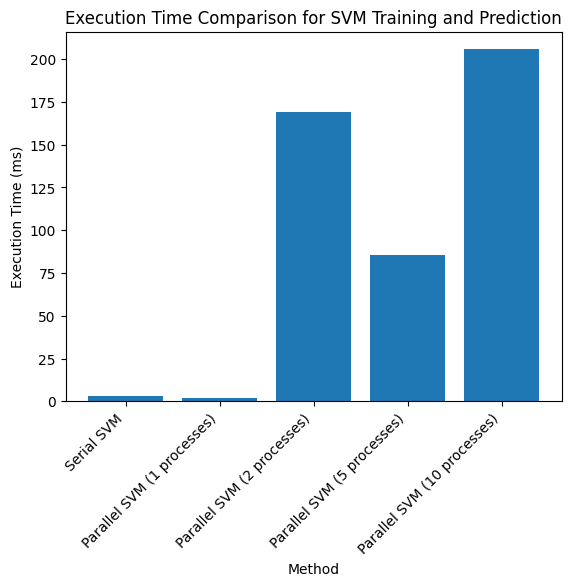

In [26]:
data = datasets.load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def train_and_predict_svm(X_train, y_train, X_test):
    clf = SVC(kernel='linear')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return y_pred

def train_and_predict_svm_parallel(X_train, y_train, X_test, i):
    clf = SVC(kernel='linear')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return y_pred

start_time = time.time()
y_pred_serial = train_and_predict_svm(X_train, y_train, X_test)
accuracy_serial = accuracy_score(y_test, y_pred_serial)
end_time = time.time()
execution_time_serial = (end_time - start_time) * 1000

num_processes_values = [1, 2, 5, 10]
execution_times_parallel = []

for num_processes in num_processes_values:
    start_time = time.time()
    results_parallel = Parallel(n_jobs=num_processes)(
        delayed(train_and_predict_svm_parallel)(X_train, y_train, X_test, i) for i in range(num_processes)
    )
    y_pred_parallel = results_parallel[0]
    accuracy_parallel = accuracy_score(y_test, y_pred_parallel)
    end_time = time.time()
    execution_time_parallel = (end_time - start_time) * 1000
    execution_times_parallel.append(execution_time_parallel)

labels = ['Serial SVM'] + [f'Parallel SVM ({num_processes} processes)' for num_processes in num_processes_values]
execution_times = [execution_time_serial] + execution_times_parallel

plt.bar(labels, execution_times)
plt.xlabel('Method')
plt.ylabel('Execution Time (ms)')
plt.title('Execution Time Comparison for SVM Training and Prediction')
plt.xticks(rotation=45, ha='right')
plt.show()